# Try out stuff...

## General Stuff

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

plt.style.use("ggplot")

In [2]:
from pathlib import Path
DATA_PATH = Path("../data/REFIT.h5").absolute().__str__()

from nilmtk import DataSet
refit = DataSet(DATA_PATH, format="HDF")        # hierarchical data frame  

In [3]:
def ndir(x):
    """ Show properties and methods with no magic methods """
    return [x for x in dir(x) if not x.__contains__("__")]

ndir(refit)

['_init_buildings',
 'buildings',
 'clear_cache',
 'describe',
 'elecs',
 'get_activity_script',
 'import_metadata',
 'metadata',
 'plot_good_sections',
 'plot_mains_power_histograms',
 'save',
 'set_window',
 'store']

In [43]:
from nilmtk.utils import print_dict
print_dict(refit.metadata)              # show meta data in nice html format

In [114]:
refit.set_window(start="2014-01-01", end="2014-01-05")      # set window for only a small chunk

## Explore Building

In [37]:
refit.buildings[1]

In [38]:
refit.buildings[1].metadata

{'instance': 1, 'original_name': 'House1', 'dataset': 'REFIT'}

In [47]:
ndir(refit.buildings[1])         # nothing interesting, besides elec

['describe', 'elec', 'identifier', 'import_metadata', 'metadata', 'save']

## Explore MeterGroup (elec)

In [115]:
elec = refit.buildings[1].elec
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REFIT', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=3, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=2)])
  ElecMeter(instance=5, building=1, dataset='REFIT', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=9, building=1, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=10, building=1, data

In [67]:
elec[2]

ElecMeter(instance=2, building=1, dataset='REFIT', appliances=[Appliance(type='fridge', instance=1)])

In [71]:
ndir(elec)

['_aggregate_metadata_attribute',
 '_check_kwargs_for_full_results_and_sections',
 '_collect_stats_on_all_meters',
 '_convert_physical_quantity_and_ac_type_to_cols',
 '_energy_per_meter_with_remainder',
 '_meter_generators',
 '_plot_area',
 '_plot_energy_bar',
 '_plot_sankey',
 '_plot_separate_lines',
 '_prep_kwargs_for_sample_period_and_resample',
 '_replace_none_with_meter_timeframe',
 '_set_sample_period',
 'activation_series',
 'activity_histogram',
 'all_meters',
 'appliances',
 'available_ac_types',
 'available_physical_quantities',
 'available_power_ac_types',
 'average_energy_per_period',
 'building',
 'call_method_on_all_meters',
 'clear_cache',
 'contains_meters_from_multiple_buildings',
 'correlation',
 'correlation_of_sum_of_submeters_with_mains',
 'dataframe_of_meters',
 'dataset',
 'describe',
 'disabled_meters',
 'dominant_appliance',
 'dominant_appliances',
 'draw_wiring_graph',
 'dropout_rate',
 'energy_per_meter',
 'entropy',
 'entropy_per_meter',
 'fraction_per_meter

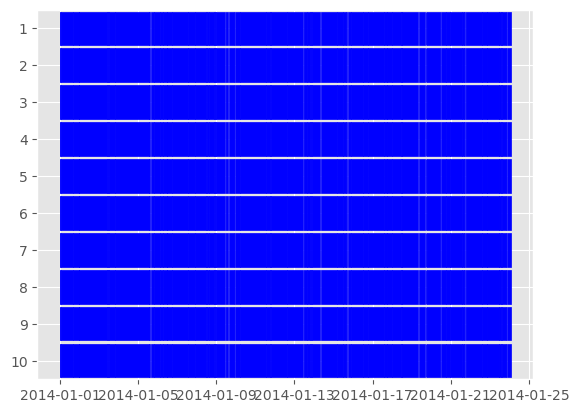

In [78]:
elec.plot_good_sections()

In [101]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.429511862995636

9/9 ElecMeter(instance=10, building=1, dataset='REFIT', appliances=[Appliance(type='electric space heater', instance=1)])

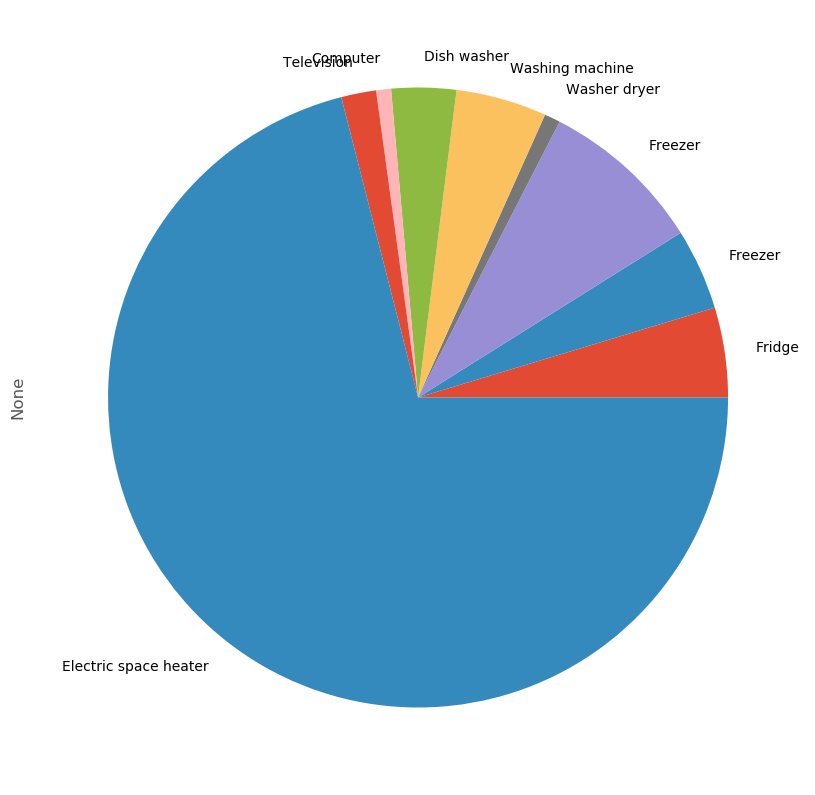

In [102]:
fraction = elec.submeters().fraction_per_meter().dropna()
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels)

In [109]:
result = dict(zip(labels, fraction))
result

{'Fridge': 0.046793921819546634,
 'Freezer': 0.08539359261259849,
 'Washer dryer': 0.008289452292193796,
 'Washing machine': 0.0473511456809446,
 'Dish washer': 0.033727413859164085,
 'Computer': 0.007770069783827712,
 'Television': 0.01818691844686392,
 'Electric space heater': 0.7101440629670881}

## Explore Mains and Submeters

In [135]:
elec.mains()        # aggregate

ElecMeter(instance=1, building=1, dataset='REFIT', site_meter, appliances=[])

In [136]:
elec.submeters()    # submeters

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='REFIT', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=3, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=2)])
  ElecMeter(instance=5, building=1, dataset='REFIT', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=9, building=1, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=10, building=1, dataset='REFIT', appliances=[Appliance(type='electric space heater', instance=1)])
)

In [125]:
aggregate = elec.mains().load(sample_period=60)         # returns generator 
aggregate = next(aggregate)                             # execute

In [126]:
type(aggregate)

pandas.core.frame.DataFrame

In [127]:
aggregate.head()

physical_quantity,power
type,active
Unix,
2014-01-01 00:00:00+00:00,655.333333
2014-01-01 00:01:00+00:00,659.000000
2014-01-01 00:02:00+00:00,650.125000
2014-01-01 00:03:00+00:00,691.500000
2014-01-01 00:04:00+00:00,782.000000


In [134]:
aggregate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5760 entries, 2014-01-01 00:00:00+00:00 to 2014-01-04 23:59:00+00:00
Freq: 60S
Data columns (total 1 columns):
(power, active)    5679 non-null float64
dtypes: float64(1)
memory usage: 90.0 KB


In [ ]:
aggregate.plot()

In [215]:
app = elec[4]
ndir(app.appliances[0])

['allow_synonyms',
 'appliance_types',
 'categories',
 'identifier',
 'label',
 'matches',
 'metadata',
 'n_meters',
 'on_power_threshold',
 'type']

In [218]:
app.label()

'Freezer'

In [162]:
app.appliances[0].metadata

{'original_name': 'Freezer(2)',
 'type': 'freezer',
 'instance': 2,
 'meters': [4],
 'dataset': 'REFIT',
 'building': 1}

In [191]:
app = app.load(sample_period=60)
app = next(app)

In [ ]:
app.plot()

## Explore Dataframe

In [231]:
df = elec.dataframe_of_meters(sample_period=60)
labels = elec.get_labels(df.columns.values)
df = df.set_axis(labels, axis=1, inplace=False)

In [232]:
df.head()

,Site meter,Fridge,Freezer,Freezer,Washer dryer,Washing machine,Dish washer,Computer,Television,Electric space heater
Unix,,,,,,,,,,
2014-01-01 00:00:00+00:00,655.333333,0.000000,0.0,76.555556,0.0,0.0,0.0,0.0,30.000000,1.0
2014-01-01 00:01:00+00:00,659.000000,0.000000,0.0,75.333333,0.0,0.0,0.0,0.0,33.666667,1.0
2014-01-01 00:02:00+00:00,650.125000,0.000000,0.0,74.125000,0.0,0.0,0.0,0.0,30.250000,1.0
2014-01-01 00:03:00+00:00,691.500000,0.000000,0.0,73.375000,0.0,0.0,0.0,0.0,30.375000,1.0
2014-01-01 00:04:00+00:00,782.000000,66.666667,0.0,72.444444,0.0,0.0,0.0,0.0,35.777778,1.0


In [233]:
df.describe()

,Site meter,Fridge,Freezer,Freezer,Washer dryer,Washing machine,Dish washer,Computer,Television,Electric space heater
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,824.773647,16.502494,13.869058,29.638473,10.243241,18.644943,20.075957,3.624935,9.135355,207.348038
std,875.669772,31.659022,22.550234,36.071855,145.192200,183.661799,205.560550,9.590727,14.474402,404.646629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,383.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,589.738889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1124.500000,0.000000,44.200000,68.900000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000
max,10723.454545,410.500000,332.000000,242.636364,2651.400000,2362.666667,2250.181818,41.500000,93.555556,1027.700000
